أول حاجة، لازم تثبت الحاجات اللي محتاجها.

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


بعد كده، تقدر تستورد الحاجات اللي هتحتاجها في الكود بالأوامر دي:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

بعد كده، هتحمل وتحلل البيانات. لازم تفك الضغط عن ملف الـ zip وتقرا الملف اللي جواه.

In [ ]:
# Load the dataset
import zipfile

# Replace 'your_zip_file.zip' with the name of your uploaded zip file
with zipfile.ZipFile('globalterrorismdb_0718dist.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Replace 'your_dataset.csv' with the name of the CSV file inside the zip
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')




<ipython-input-3-7035acb01774>:9: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


بعد ما تقرأ البيانات، لازم تنظفها. اتأكد إنك تشيل أي صف فيه قيم ناقصة في الأعمدة "nwound" و "nkill" و "success".


بعد كده، لازم تحدد الأعمدة اللي هتستخدمها كميزات والعمود اللي هتستخدمه كمتغير هدف.

قبل ما تكمل، تتأكد إن البيانات مش فاضية.

In [ ]:
# Data Cleaning
# Remove missing values and outliers from the data
df.dropna(subset=['nwound', 'nkill', 'success'], inplace=True)


# Select the features and target variable
X = df[['nwound', 'nkill']]
Y = df['success']

# Check if the dataset is empty
if len(X) == 0:
    raise ValueError("Dataset is empty")




بعد كده، لازم تقسم البيانات لجروب التدريب وجروب التجربة بستخدام دالة "train_test_split". هتقسم البيانات 80% للتدريب و20% للتجربة.

قبل ما تكمل، تتأكد إن البيانات فعلا مقسمة صح.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check if the dataset is empty
if len(df) == 0:
    raise ValueError("Data is empty")




بعد كده، تقدر تبدأ تدريب النموذج. هتستخدم "Random Forest Classifier" وتحدد 100 "trees" في التجميع وتستخدم "random_state" برقم 42.

In [ ]:
# Train the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, Y_train)




RandomForestClassifier(random_state=42)

بعد كده، هتعمل توقعات على جروب التجربة وتحسب الدقة.

In [ ]:
# Make predictions on the test set
Y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))




Accuracy: 88.24%


بعد كده، هترسم "مصفوفة الارتباك" بستخدام الباكدج "seaborn" و "matplotlib".

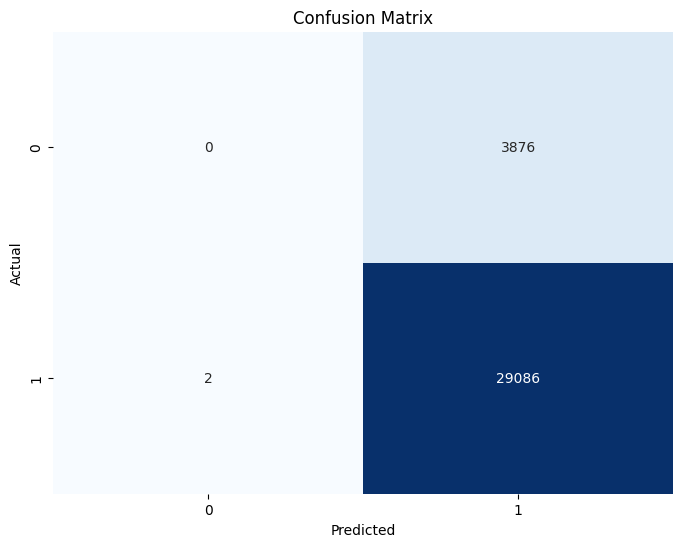

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




بعد كده، تقدر ترسم "مصفوفة الترابط" عشان تشوف العلاقة بين المتغيرات.

<ipython-input-9-fafa40703345>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


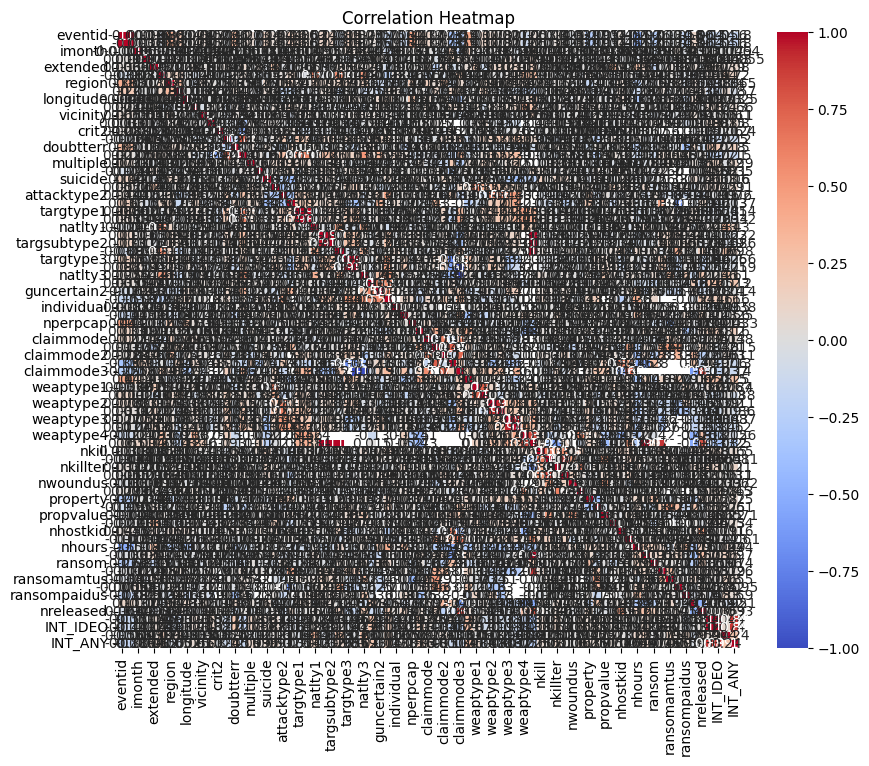

In [ ]:
# Create a correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



أخيرًا، هتحدد أهمية الميزات في التصنيف بستخدام "feature importances" من النموذج اللي اتدرب.

In [ ]:
"""# Get feature importances from the trained classifier
importances = classifier.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Get the names of the features
feature_names = X.columns[sorted_indices]"""

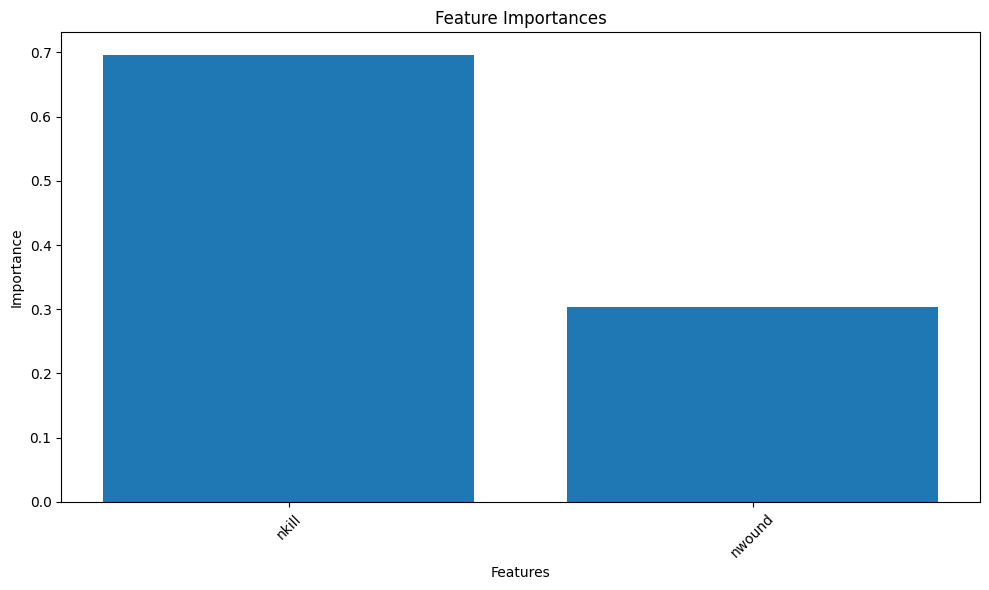

In [ ]:
"""# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, sorted_importances)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()"""